In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

## 5. Data Preprocessing

In [3]:
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
num_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx', 'nr.employed']

#### 5.1 Train - Test split

In [4]:
# data.to_csv('data.csv')

In [5]:
data = pd.read_csv('data.csv')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('y', axis=1), data.y.values, stratify=data.y, test_size=0.2, random_state=10)

print("Train data shape: ", X_train.shape, y_train.shape)
print("Test data shape: ",X_test.shape, y_test.shape)

Train data shape:  (32592, 19) (32592,)
Test data shape:  (8148, 19) (8148,)


/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


#### 5.2 Data transformation

##### 5.2.1 Numerical features scaling

In [7]:
scaler = StandardScaler()
scaler = scaler.fit(data[num_features])

/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [8]:
# creating new empty dataframes to store processed data for training
X_train_processed = X_train.drop(cat_features, axis=1)
X_test_processed = X_test.drop(cat_features, axis=1)
X_train_processed.columns

Index(['Unnamed: 0', 'age', 'duration', 'campaign', 'pdays', 'previous',
       'cons.price.idx', 'cons.conf.idx', 'nr.employed'],
      dtype='object')

In [9]:
X_train_processed.reset_index(drop=True, inplace=True)
X_test_processed.reset_index(drop=True, inplace=True)

In [10]:
# transform all numerical features and save it new dataframes
X_train_processed[num_features] = scaler.transform(X_train[num_features])
X_test_processed[num_features] = scaler.transform(X_test[num_features])

/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprec

##### 5.2.2 Categorical feature tranformation

* We will tranform categorical features using onehot encoder

In [11]:
onehotencoder = OneHotEncoder(handle_unknown='ignore')
cat_features_ohe = onehotencoder.fit(X_train[cat_features])

/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Che

In [12]:
X_train_ohe = cat_features_ohe.transform(X_train[cat_features])
X_test_ohe = cat_features_ohe.transform(X_test[cat_features])

/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Che

In [13]:
X_train_ohe.toarray().shape

(32592, 52)

In [14]:
cat_feature_labels_ohe = np.concatenate(cat_features_ohe.categories_).ravel().tolist()

In [15]:
X_train_ohe = pd.DataFrame(X_train_ohe.toarray(), columns=cat_feature_labels_ohe)
X_test_ohe = pd.DataFrame(X_test_ohe.toarray(), columns=cat_feature_labels_ohe)

In [16]:
print("shape of categorical features of train and test sets after converting categorical features with one hot encoding:")
X_train_ohe.shape, X_test_ohe.shape

shape of categorical features of train and test sets after converting categorical features with one hot encoding:


((32592, 52), (8148, 52))

##### 5.2.3 Merging transformed numerical features and categorical features

In [17]:
X_train_final = pd.concat([X_train_ohe, X_train_processed], axis=1)
X_test_final = pd.concat([X_test_ohe, X_test_processed], axis=1)

print("Final processed train data and test data shapes: ")
print(X_train_final.shape, X_test_final.shape)

Final processed train data and test data shapes: 
(32592, 61) (8148, 61)


In [18]:
X_train_final.drop('Unnamed: 0', axis=1, inplace=True)
X_test_final.drop('Unnamed: 0', axis=1, inplace=True)

In [19]:
# X_train_final.to_csv('X_train_final.csv') #, index=False
# X_test_final.to_csv('X_test_final.csv') #, index=False

## 6. Modeling

In [20]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier
#from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, f1_score, precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import confusion_matrix
from scikitplot.metrics import plot_cumulative_gain

In [21]:
def print_confusion_matrix_accuracy(model, X_test, y_true):
    # print confusion matrix
    y_pred = model.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_true, y_pred)

    tn, fp, fn, tp = confusion_matrix_test.flatten()
    accuracy = (tp + tn)/ (tn + fp + fn + tp)
    print("Model Accuracy: ", accuracy)
    
    # code reference - https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    confusion_matrix_test.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         confusion_matrix_test.flatten()/np.sum(confusion_matrix_test)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion_matrix_test, annot=labels, fmt='', cmap='Greens')
    plt.title("Confusion Matrix for Test Data")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
        
    return y_pred, accuracy


In [22]:
def plot_auc(model, X_train, X_test, y_train, y_test):
    # AUC
    y_train_pred_prob = model.predict_proba(X_train) # taking only predictions for positive class
    y_test_pred_prob = model.predict_proba(X_test) # taking only predictions for positive class

    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred_prob[:, 1])
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred_prob[:, 1])

    plt.plot(train_fpr, train_tpr, label='Train AUC:'+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label='Test AUC:'+str(auc(test_fpr, test_tpr)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC curve for train and test sets')
    plt.legend()
    plt.show()

    return y_train_pred_prob, y_test_pred_prob, auc(test_fpr, test_tpr)

In [23]:
def precision_recall_f1(y_test, y_pred):
    precision, recall, f1_beta, support = precision_recall_fscore_support(y_test, y_pred) #, average='micro'
    print('Precision Score for class-0:', precision[0], 'and class-1: ', precision[1])
    print('-'*100)
    print('Recall Score for class-0:', recall[0], 'and class-1:', recall[1])
    print('-'*100)
    print('F1 Score for class-0:', f1_beta[0], 'and class-1:', f1_beta[1])
    # print('Support: ', support)
    return precision, recall, f1_beta

In [24]:
def plot_gain_curve(y_true, y_pred_prob, x, y):
    plot_cumulative_gain(y_true, y_pred_prob)
    plt.vlines(x=x, ymax=1, ymin=0, colors='g', linestyles='--')
    plt.hlines(y=y, xmax=0.9, xmin=0, colors='g', linestyles='--')
    plt.show()
    
    # plot_lift_curve(y_test, y_test_pred_prob)

In [25]:
def get_lift_index(y_true, y_pred_prob):
    decile_df = pd.DataFrame(list(zip(y_true, y_pred_prob[:, 1])), columns=['y_true','y_pred'])
    decile_df['decile'] = pd.qcut(decile_df.y_pred, 10, duplicates='drop') #, duplicates='drop'  labels=np.arange(10,0,-1),
    lift_df = decile_df.groupby('decile')['y_pred'].count().reset_index()
    lift_df.rename({'y_pred':'total'}, axis=1, inplace=True)
    lift_df_pred = decile_df[decile_df.y_true==1].groupby('decile')['y_true'].count().reset_index()
    lift_df_final = lift_df.merge(lift_df_pred, on='decile')
    lift_df_final = lift_df_final.sort_values(['decile'], ascending=False)

    lift_df_final['decile'] = [(i+1) for i in range(len(lift_df_final.decile.unique()))]
    
    # calculate the weighted lift index value
    w = 1 # initializing the weight to 1
    lift_index = 0.0
    for cnt in lift_df_final.y_true.values:
        lift_index += cnt * w
        w = w - 0.1
    
    lift_index = lift_index/lift_df_final.y_true.sum()
    return lift_index

In [26]:
metrics = dict()

### 6.1 Logistic Regression

In [27]:
lr = LogisticRegression(random_state=10, max_iter=1000) #, max_iter=500

model = lr.fit(X_train_final, y_train)

/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


##### 6.1.1 Performance Analysis - Confusion matrix, Accuracy, AUC, F1 Score, LIFT

Model Accuracy:  0.9128620520373097


/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


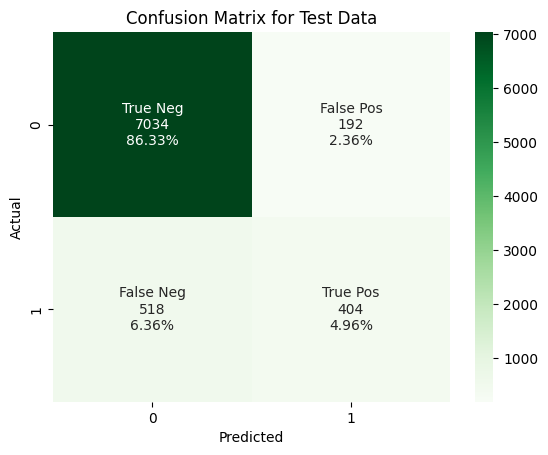

In [28]:
y_test_pred, acc = print_confusion_matrix_accuracy(model, X_test_final, y_test)

/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprec

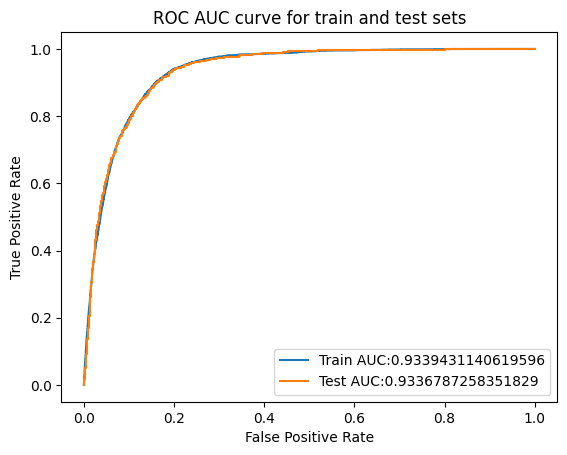

In [29]:
y_train_pred_prob, y_test_pred_prob, roc_auc = plot_auc(model, X_train_final, X_test_final, y_train, y_test)

In [30]:
prec, rec, f1 = precision_recall_f1(y_test, y_test_pred)

Precision Score for class-0: 0.9314088983050848 and class-1:  0.6778523489932886
----------------------------------------------------------------------------------------------------
Recall Score for class-0: 0.9734292831442015 and class-1: 0.43817787418655096
----------------------------------------------------------------------------------------------------
F1 Score for class-0: 0.9519556096900799 and class-1: 0.5322793148880106


In [31]:
lift_index = get_lift_index(y_test, y_test_pred_prob)

/var/folders/cr/9s09bcld7z3fwks4vwn0x5900000gn/T/ipykernel_27705/869940014.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lift_df = decile_df.groupby('decile')['y_pred'].count().reset_index()
/var/folders/cr/9s09bcld7z3fwks4vwn0x5900000gn/T/ipykernel_27705/869940014.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lift_df_pred = decile_df[decile_df.y_true==1].groupby('decile')['y_true'].count().reset_index()


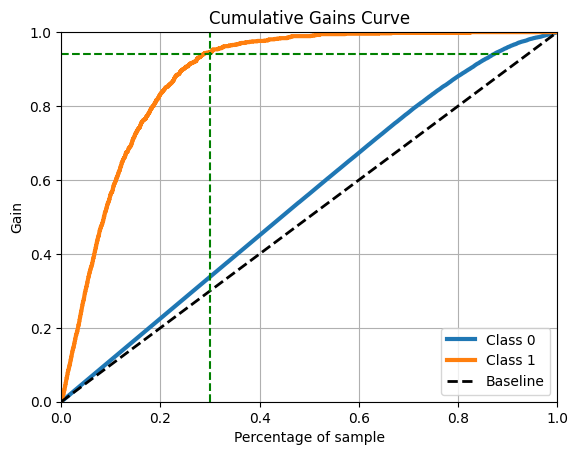

In [32]:
plot_gain_curve(y_test, y_test_pred_prob, 0.3, 0.94)

* From the above cumulative gain curve...
    * Orange curve represents the cumulative gain for positive class.
    * A green horizontal and vertical dashed lines are plotted to denote the point where gain curve begins to platue
    * This intersection point tells us, with only 30% of the leads we can acheive 94% of the conversion rate.

In [33]:
metrics['LR'] = dict()
metrics['LR']['accuracy'] = acc
metrics['LR']['auc'] = roc_auc
metrics['LR']['prec'] = prec
metrics['LR']['recal'] = rec
metrics['LR']['f1'] = f1
metrics['LR']['lift'] = lift_index

##### The below snippet is taken to cross check whether the above cumulative gain plot is giving the same result as this gain curve

In [34]:
# decile_df = pd.DataFrame(list(zip(np.hstack((y_train,y_test)), np.hstack((y_train_pred_prob[:, 1],y_test_pred_prob[:, 1])))), columns=['y_true','y_pred'])
decile_df = pd.DataFrame(list(zip(y_test, y_test_pred_prob[:, 1])), columns=['y_true','y_pred'])

In [35]:
# this piece of code taken from 
# https://medium.com/the-innovation/lead-conversion-score-prediction-using-python-a65d5bb7ccff
# to learn and understand the concept of lift curve analysis


decile_df['decile'] = pd.qcut(decile_df.y_pred, 10) #, labels=np.arange(10,0,-1)

lift_df = decile_df.groupby('decile')['y_pred'].count().reset_index()

lift_df.rename({'y_pred':'total'}, axis=1, inplace=True)

lift_df_pred = decile_df[decile_df.y_true==1].groupby('decile')['y_true'].count().reset_index()

lift_df_final = lift_df.merge(lift_df_pred, on='decile')

lift_df_final = lift_df_final.sort_values(['decile'], ascending=False)

lift_df_final['decile'] = [(i+1) for i in range(len(lift_df_final.decile.unique()))]

lift_df_final['cumresp'] = lift_df_final.y_true.cumsum()

lift_df_final['gain'] = (lift_df_final['cumresp']/sum(lift_df_final['y_true'])) * 100

lift_df_final['cumlift'] = lift_df_final['gain']/(lift_df_final['decile'].astype('int') * (100/10))

/var/folders/cr/9s09bcld7z3fwks4vwn0x5900000gn/T/ipykernel_27705/230989060.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lift_df = decile_df.groupby('decile')['y_pred'].count().reset_index()
/var/folders/cr/9s09bcld7z3fwks4vwn0x5900000gn/T/ipykernel_27705/230989060.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lift_df_pred = decile_df[decile_df.y_true==1].groupby('decile')['y_true'].count().reset_index()


In [36]:
lift_df_final

,decile,total,y_true,cumresp,gain,cumlift
9,1,815,519,519,56.290672,5.629067
8,2,815,249,768,83.297180,4.164859
7,3,815,104,872,94.577007,3.152567
6,4,814,28,900,97.613883,2.440347
5,5,815,12,912,98.915401,1.978308
4,6,815,6,918,99.566161,1.659436
3,7,814,2,920,99.783080,1.425473
2,8,815,0,920,99.783080,1.247289
1,9,815,2,922,100.000000,1.111111
0,10,815,0,922,100.000000,1.000000


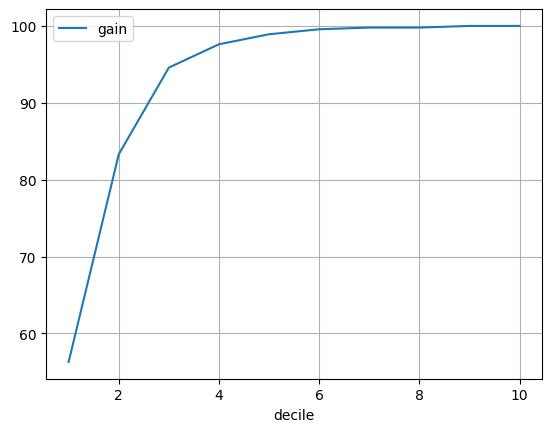

In [37]:
lift_df_final.plot.line(x='decile', y='gain')
plt.grid()
plt.show()

* The above curve also showing the same gain rate as the cumulative curve which was drwan using scikit-plot

### 6.2 Naive Bayes

In [38]:
gnb_clf = GaussianNB()

gnb_clf.fit(X_train_final, y_train)

/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


GaussianNB()

#### 6.2.1 Performance Analysis - Confusion matrix, Accuracy, AUC, F1 Score, LIFT

Model Accuracy:  0.8718703976435935


/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


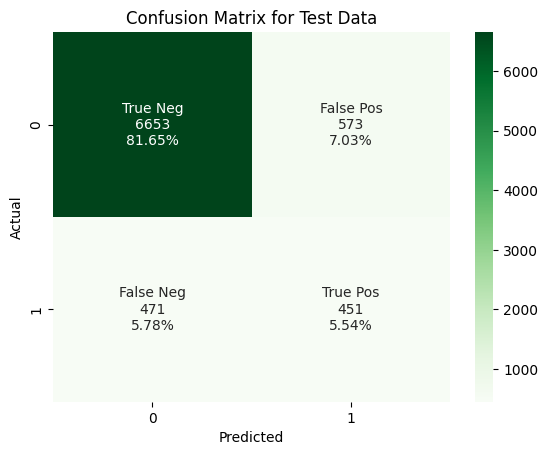

In [39]:
y_test_pred, acc = print_confusion_matrix_accuracy(gnb_clf, X_test_final, y_test)

/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprec

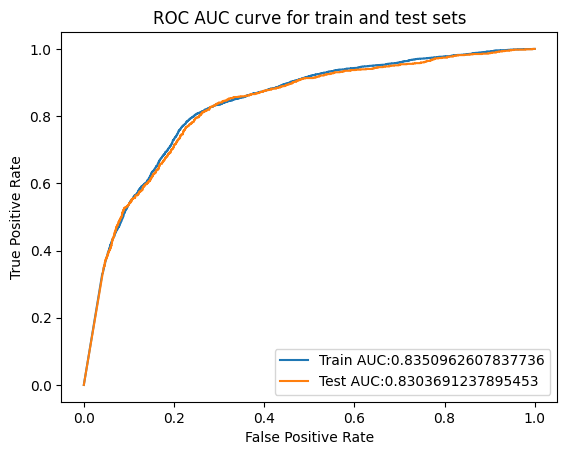

In [40]:
y_train_pred_prob, y_test_pred_prob, roc_auc = plot_auc(gnb_clf, X_train_final, X_test_final, y_train, y_test)

In [41]:
prec, rec, f1 = precision_recall_f1(y_test, y_test_pred)

Precision Score for class-0: 0.9338854576080854 and class-1:  0.4404296875
----------------------------------------------------------------------------------------------------
Recall Score for class-0: 0.9207030168834763 and class-1: 0.4891540130151844
----------------------------------------------------------------------------------------------------
F1 Score for class-0: 0.927247386759582 and class-1: 0.46351490236382326


In [42]:
lift_index = get_lift_index(y_test, y_test_pred_prob)

/var/folders/cr/9s09bcld7z3fwks4vwn0x5900000gn/T/ipykernel_27705/869940014.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lift_df = decile_df.groupby('decile')['y_pred'].count().reset_index()
/var/folders/cr/9s09bcld7z3fwks4vwn0x5900000gn/T/ipykernel_27705/869940014.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lift_df_pred = decile_df[decile_df.y_true==1].groupby('decile')['y_true'].count().reset_index()


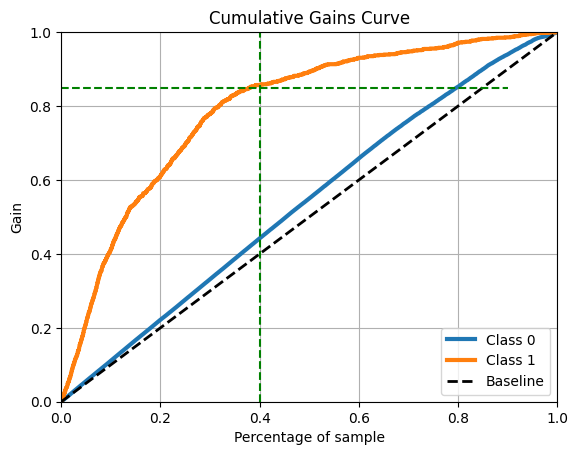

In [43]:
plot_gain_curve(y_test, y_test_pred_prob, x=0.4, y=0.85)

* From the above cumulative gain curve...
    * Orange curve represents the cumulative gain for positive class.
    * A green horizontal and vertical dashed lines are plotted to denote the point where gain curve begins to platue
    * This intersection point tells us, with only 40% of the leads we can acheive 85% of the conversion rate.

In [44]:
metrics['NB'] = dict()
metrics['NB']['accuracy'] = acc
metrics['NB']['auc'] = roc_auc
metrics['NB']['prec'] = prec
metrics['NB']['recal'] = rec
metrics['NB']['f1'] = f1
metrics['NB']['lift'] = lift_index

### 6.3 SVM

#### 6.3.1 SVC with RBF kernel

In [45]:
svc_clf = SVC(probability=True)

svc_clf.fit(X_train_final, y_train)

/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


SVC(probability=True)

##### 6.3.1.1 Performance Analysis - Confusion matrix, Accuracy, AUC, F1 Score, LIFT

/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Model Accuracy:  0.9117574864997545


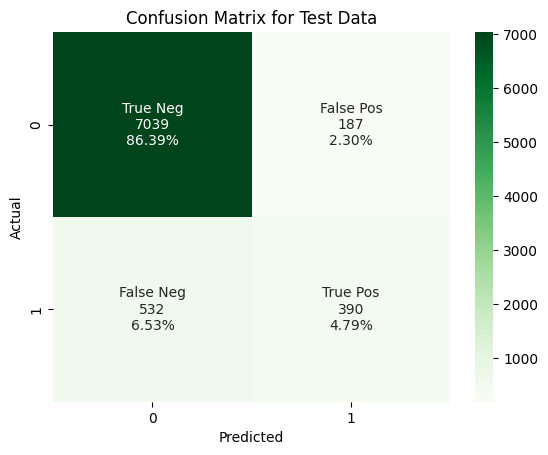

In [46]:
y_test_pred, acc = print_confusion_matrix_accuracy(svc_clf, X_test_final, y_test)

/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprec

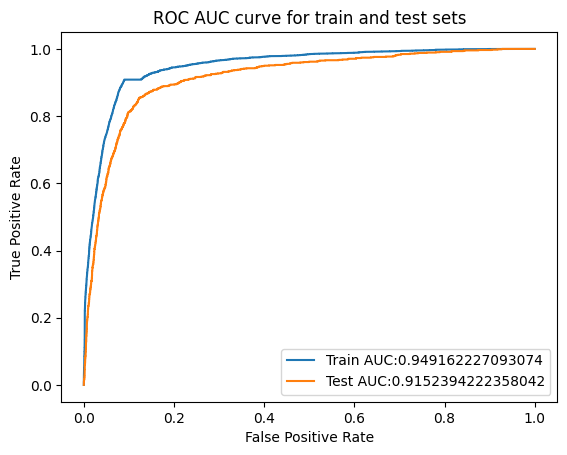

In [47]:
y_train_pred_prob, y_test_pred_prob, roc_auc = plot_auc(svc_clf, X_train_final, X_test_final, y_train, y_test)

In [48]:
prec, rec, f1 = precision_recall_f1(y_test, y_test_pred)

Precision Score for class-0: 0.9297318716153744 and class-1:  0.6759098786828422
----------------------------------------------------------------------------------------------------
Recall Score for class-0: 0.9741212288956546 and class-1: 0.4229934924078091
----------------------------------------------------------------------------------------------------
F1 Score for class-0: 0.9514090694059606 and class-1: 0.5203468979319547


In [49]:
lift_index = get_lift_index(y_test, y_test_pred_prob)

/var/folders/cr/9s09bcld7z3fwks4vwn0x5900000gn/T/ipykernel_27705/869940014.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lift_df = decile_df.groupby('decile')['y_pred'].count().reset_index()
/var/folders/cr/9s09bcld7z3fwks4vwn0x5900000gn/T/ipykernel_27705/869940014.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lift_df_pred = decile_df[decile_df.y_true==1].groupby('decile')['y_true'].count().reset_index()


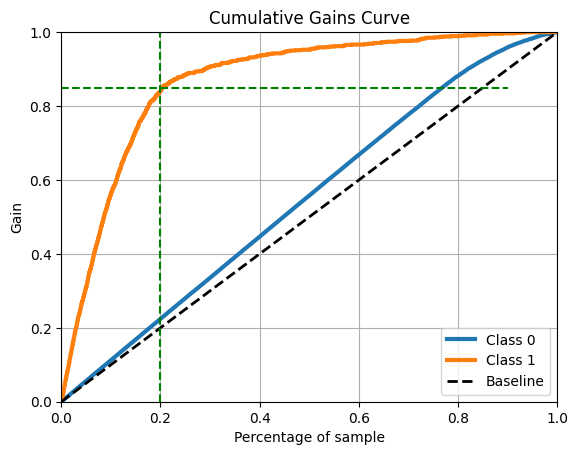

In [50]:
plot_gain_curve(y_test, y_test_pred_prob, x=0.2, y=0.85)

* From the above cumulative gain curve...
    * Orange curve represents the cumulative gain for positive class.
    * A green horizontal and vertical dashed lines are plotted to denote the point where gain curve begins to platue
    * This intersection point tells us, with only 20% of the leads we can acheive 85% of the conversion rate.

In [51]:
metrics['SVC'] = dict()
metrics['SVC']['accuracy'] = acc
metrics['SVC']['auc'] = roc_auc
metrics['SVC']['prec'] = prec
metrics['SVC']['recal'] = rec
metrics['SVC']['f1'] = f1
metrics['SVC']['lift'] = lift_index

#### 6.3.2 SVC - Linear Kernel

In [52]:
svclin_clf = SVC(kernel='linear', probability=True)

svclin_clf.fit(X_train_final, y_train)

/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


SVC(kernel='linear', probability=True)

##### 6.3.2.1 Performance Analysis - Confusion matrix, Accuracy, AUC, F1 Score, LIFT

/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Model Accuracy:  0.907093765341188


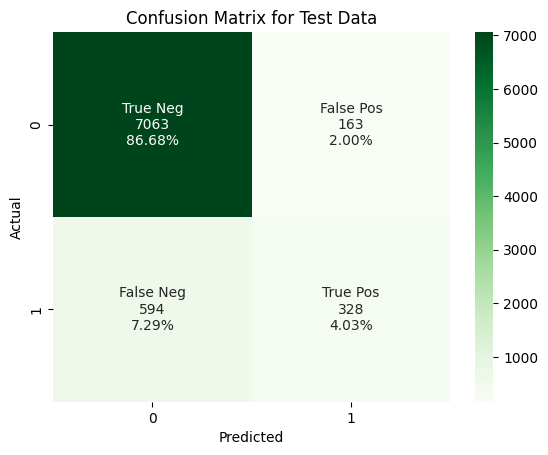

In [53]:
y_test_pred, acc = print_confusion_matrix_accuracy(svclin_clf, X_test_final, y_test)

/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprec

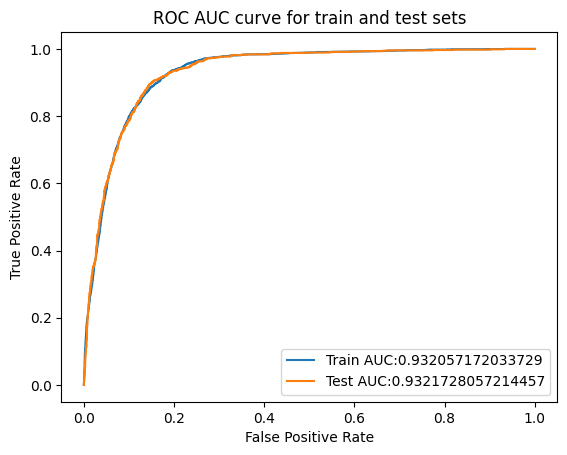

In [54]:
y_train_pred_prob, y_test_pred_prob, roc_auc = plot_auc(svclin_clf, X_train_final, X_test_final, y_train, y_test)

In [55]:
prec, rec, f1 = precision_recall_f1(y_test, y_test_pred)

Precision Score for class-0: 0.9224239258195116 and class-1:  0.6680244399185336
----------------------------------------------------------------------------------------------------
Recall Score for class-0: 0.9774425685026293 and class-1: 0.3557483731019523
----------------------------------------------------------------------------------------------------
F1 Score for class-0: 0.9491365988040046 and class-1: 0.4642604387827318


In [56]:
lift_index = get_lift_index(y_test, y_test_pred_prob)

/var/folders/cr/9s09bcld7z3fwks4vwn0x5900000gn/T/ipykernel_27705/869940014.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lift_df = decile_df.groupby('decile')['y_pred'].count().reset_index()
/var/folders/cr/9s09bcld7z3fwks4vwn0x5900000gn/T/ipykernel_27705/869940014.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lift_df_pred = decile_df[decile_df.y_true==1].groupby('decile')['y_true'].count().reset_index()


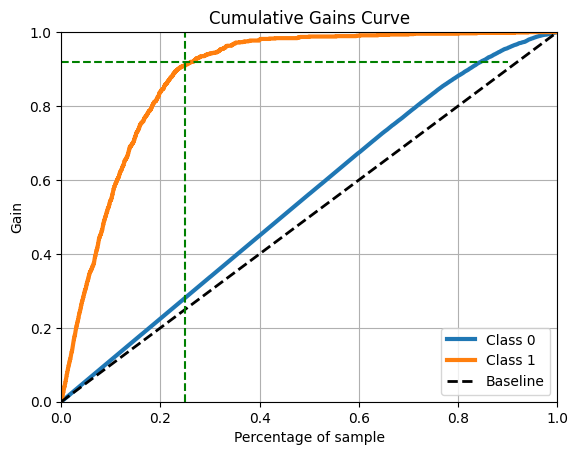

In [57]:
plot_gain_curve(y_test, y_test_pred_prob, x=0.25, y=0.92)

* From the above cumulative gain curve...
    * Orange curve represents the cumulative gain for positive class.
    * A green horizontal and vertical dashed lines are plotted to denote the point where gain curve begins to platue
    * This intersection point tells us, with only 20% of the leads we can acheive 85% of the conversion rate.

In [58]:
metrics['SVC Linear'] = dict()
metrics['SVC Linear']['accuracy'] = acc
metrics['SVC Linear']['auc'] = roc_auc
metrics['SVC Linear']['prec'] = prec
metrics['SVC Linear']['recal'] = rec
metrics['SVC Linear']['f1'] = f1
metrics['SVC Linear']['lift'] = lift_index

#### 6.3.3 SVC - Polynomial Kernel

In [59]:
svcpoly_clf = SVC(kernel='poly', probability=True)

svcpoly_clf.fit(X_train_final, y_train)

/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


SVC(kernel='poly', probability=True)

##### 6.3.1.1 Performance Analysis - Confusion matrix, Accuracy, AUC, F1 Score, LIFT

/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Model Accuracy:  0.9095483554246441


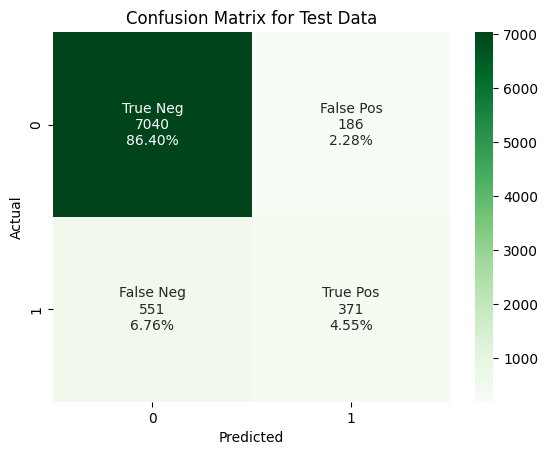

In [60]:
y_test_pred, acc = print_confusion_matrix_accuracy(svcpoly_clf, X_test_final, y_test)

/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprec

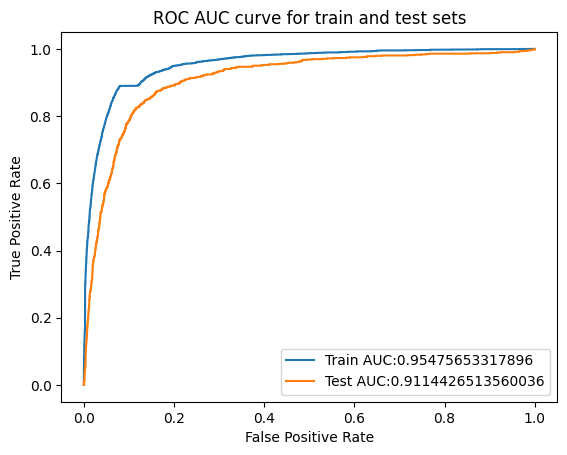

In [61]:
y_train_pred_prob, y_test_pred_prob, roc_auc = plot_auc(svcpoly_clf, X_train_final, X_test_final, y_train, y_test)

In [62]:
prec, rec, f1 = precision_recall_f1(y_test, y_test_pred)

Precision Score for class-0: 0.9274140429455935 and class-1:  0.6660682226211849
----------------------------------------------------------------------------------------------------
Recall Score for class-0: 0.9742596180459452 and class-1: 0.40238611713665945
----------------------------------------------------------------------------------------------------
F1 Score for class-0: 0.9502598366740906 and class-1: 0.5016903313049358


In [63]:
lift_index = get_lift_index(y_test, y_test_pred_prob)

/var/folders/cr/9s09bcld7z3fwks4vwn0x5900000gn/T/ipykernel_27705/869940014.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lift_df = decile_df.groupby('decile')['y_pred'].count().reset_index()
/var/folders/cr/9s09bcld7z3fwks4vwn0x5900000gn/T/ipykernel_27705/869940014.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lift_df_pred = decile_df[decile_df.y_true==1].groupby('decile')['y_true'].count().reset_index()


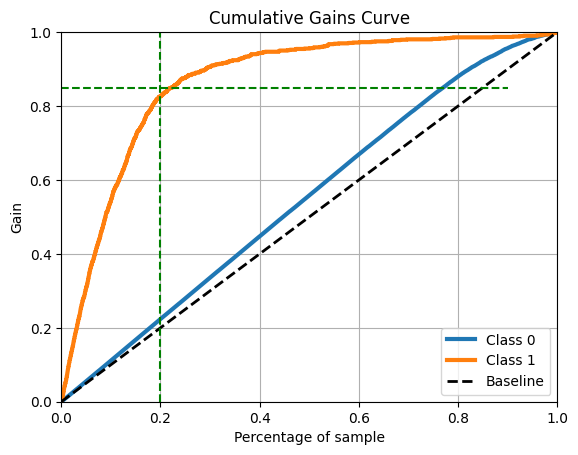

In [64]:
plot_gain_curve(y_test, y_test_pred_prob, x=0.2, y=0.85)

* From the above cumulative gain curve...
    * Orange curve represents the cumulative gain for positive class.
    * A green horizontal and vertical dashed lines are plotted to denote the point where gain curve begins to platue
    * This intersection point tells us, with only 20% of the leads we can acheive 85% of the conversion rate.

In [65]:
metrics['SVC Poly'] = dict()
metrics['SVC Poly']['accuracy'] = acc
metrics['SVC Poly']['auc'] = roc_auc
metrics['SVC Poly']['prec'] = prec
metrics['SVC Poly']['recal'] = rec
metrics['SVC Poly']['f1'] = f1
metrics['SVC Poly']['lift'] = lift_index

### 6.4 Decision Tree Classifier

In [66]:
dt_clf = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=10)

dt_clf.fit(X_train_final, y_train)

/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=10)

##### 6.4.1 Performance Analysis - Confusion matrix, Accuracy, AUC, F1 Score, LIFT

Model Accuracy:  0.9085665193912617


/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


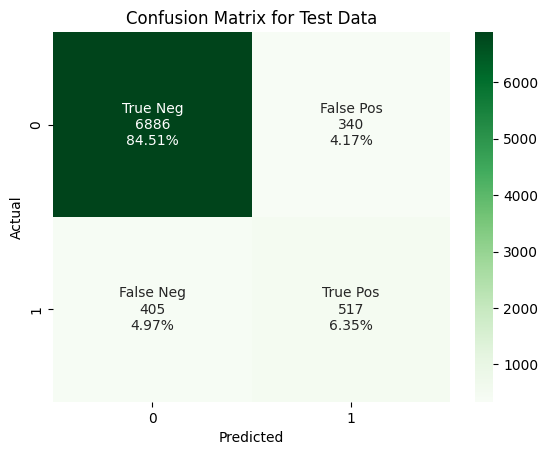

In [67]:
y_test_pred, acc = print_confusion_matrix_accuracy(dt_clf, X_test_final, y_test)

/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprec

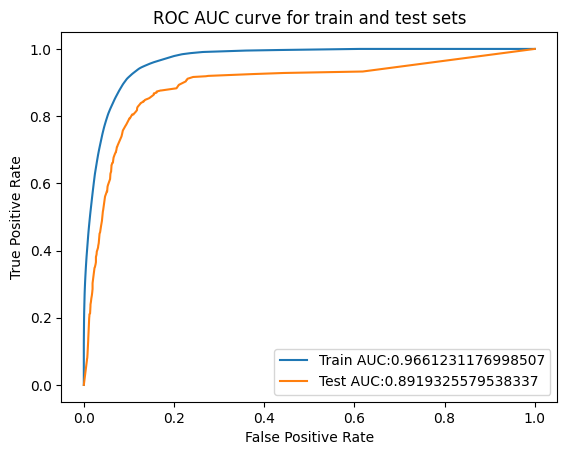

In [68]:
y_train_pred_prob, y_test_pred_prob, roc_auc = plot_auc(dt_clf, X_train_final, X_test_final, y_train, y_test)

In [69]:
prec, rec, f1 = precision_recall_f1(y_test, y_test_pred)

Precision Score for class-0: 0.9444520641887258 and class-1:  0.603267211201867
----------------------------------------------------------------------------------------------------
Recall Score for class-0: 0.9529476889011902 and class-1: 0.5607375271149675
----------------------------------------------------------------------------------------------------
F1 Score for class-0: 0.9486808569263623 and class-1: 0.5812254075323214


In [70]:
lift_index = get_lift_index(y_test, y_test_pred_prob)

/var/folders/cr/9s09bcld7z3fwks4vwn0x5900000gn/T/ipykernel_27705/869940014.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lift_df = decile_df.groupby('decile')['y_pred'].count().reset_index()
/var/folders/cr/9s09bcld7z3fwks4vwn0x5900000gn/T/ipykernel_27705/869940014.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lift_df_pred = decile_df[decile_df.y_true==1].groupby('decile')['y_true'].count().reset_index()


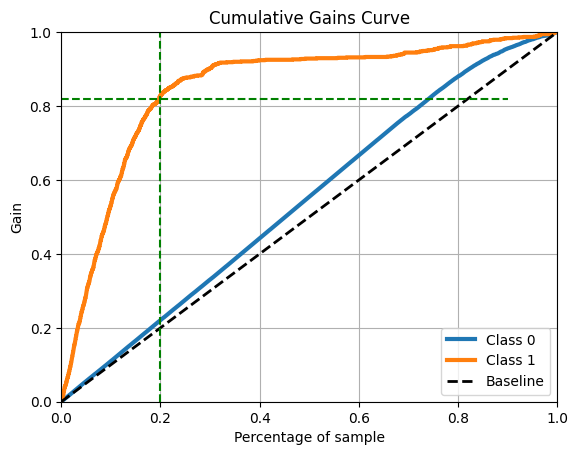

In [71]:
plot_gain_curve(y_test, y_test_pred_prob, x=0.2, y=0.82)

* From the above cumulative gain curve...
    * Orange curve represents the cumulative gain for positive class.
    * A green horizontal and vertical dashed lines are plotted to denote the point where gain curve begins to platue
    * This intersection point tells us, with only 20% of the leads we can acheive 82% of the conversion rate.

In [72]:
metrics['DT'] = dict()
metrics['DT']['accuracy'] = acc
metrics['DT']['auc'] = roc_auc
metrics['DT']['prec'] = prec
metrics['DT']['recal'] = rec
metrics['DT']['f1'] = f1
metrics['DT']['lift'] = lift_index

#### 6.5 Random Forest Classifier

In [73]:
rf_clf = RandomForestClassifier(min_samples_leaf=2, random_state=10) #n_estimators=500, max_depth=10, min_samples_split=5

rf_clf.fit(X_train_final, y_train)

/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


RandomForestClassifier(min_samples_leaf=2, random_state=10)

##### 6.5.1 Performance Analysis - Confusion matrix, Accuracy, AUC, F1 Score, LIFT

Model Accuracy:  0.9128620520373097


/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


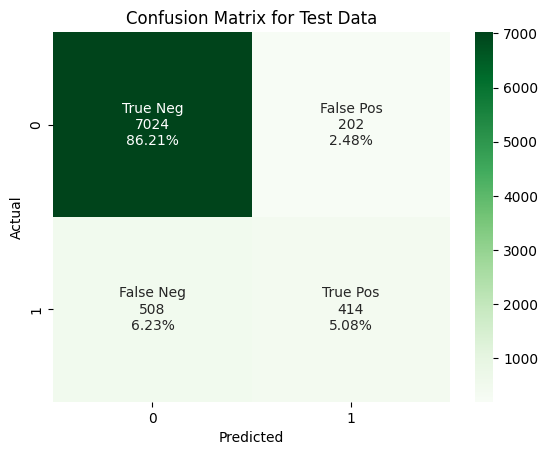

In [74]:
y_test_pred, acc = print_confusion_matrix_accuracy(rf_clf, X_test_final, y_test)

/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/mahsa/anaconda3/envs/playground/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprec

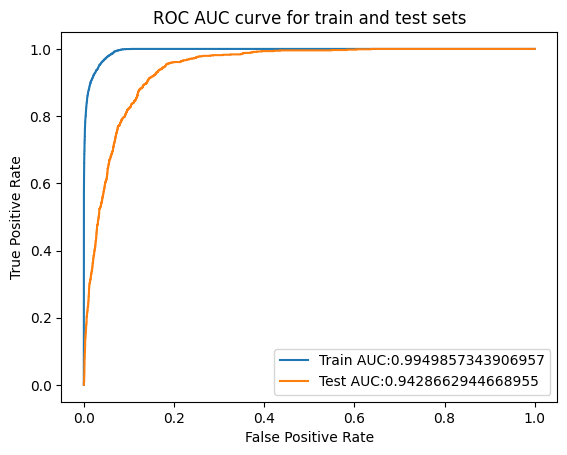

In [75]:
y_train_pred_prob, y_test_pred_prob, roc_auc = plot_auc(rf_clf, X_train_final, X_test_final, y_train, y_test)

In [76]:
prec, rec, f1 = precision_recall_f1(y_test, y_test_pred)

Precision Score for class-0: 0.9325544344131704 and class-1:  0.672077922077922
----------------------------------------------------------------------------------------------------
Recall Score for class-0: 0.9720453916412953 and class-1: 0.4490238611713666
----------------------------------------------------------------------------------------------------
F1 Score for class-0: 0.9518905000677598 and class-1: 0.5383615084525357


In [77]:
lift_index = get_lift_index(y_test, y_test_pred_prob)
lift_index

/var/folders/cr/9s09bcld7z3fwks4vwn0x5900000gn/T/ipykernel_27705/869940014.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lift_df = decile_df.groupby('decile')['y_pred'].count().reset_index()
/var/folders/cr/9s09bcld7z3fwks4vwn0x5900000gn/T/ipykernel_27705/869940014.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lift_df_pred = decile_df[decile_df.y_true==1].groupby('decile')['y_true'].count().reset_index()


0.9350325379609543

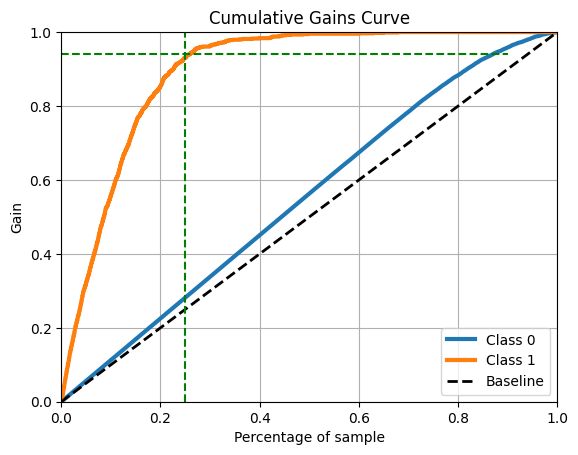

In [78]:
plot_gain_curve(y_test, y_test_pred_prob, x=0.25, y=0.94)

* From the above cumulative gain curve...
    * Orange curve represents the cumulative gain for positive class.
    * A green horizontal and vertical dashed lines are plotted to denote the point where gain curve begins to platue
    * This intersection point tells us, with only 25% of the leads we can acheive 94% of the conversion rate.

In [79]:
metrics['RF'] = dict()
metrics['RF']['accuracy'] = acc
metrics['RF']['auc'] = roc_auc
metrics['RF']['prec'] = prec
metrics['RF']['recal'] = rec
metrics['RF']['f1'] = f1
metrics['RF']['lift'] = lift_index

#### 6.6 XGBoost Classifier

In [80]:
xgb_clf = XGBClassifier(random_state=10)

xgb_clf.fit(X_train_final, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=10, ...)

##### 6.6.1 Performance Analysis - Confusion matrix, Accuracy, AUC, F1 Score, LIFT

Model Accuracy:  0.9148257241040746


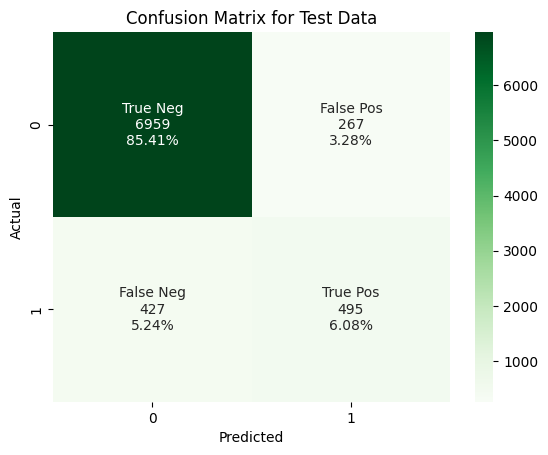

In [81]:
y_test_pred, acc = print_confusion_matrix_accuracy(xgb_clf, X_test_final, y_test)

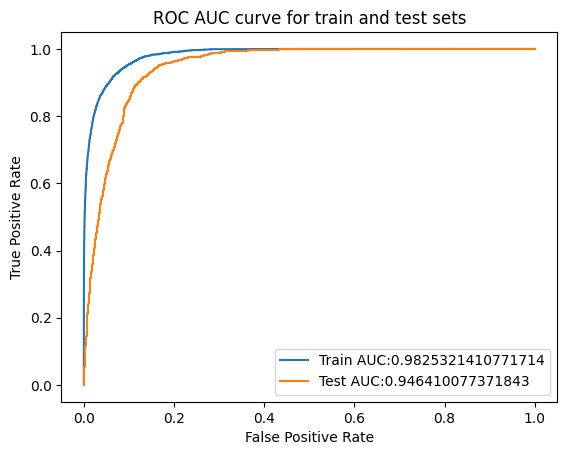

In [82]:
y_train_pred_prob, y_test_pred_prob, roc_auc = plot_auc(xgb_clf, X_train_final, X_test_final, y_train, y_test)

In [83]:
prec, rec, f1 = precision_recall_f1(y_test, y_test_pred)

Precision Score for class-0: 0.9421879230977525 and class-1:  0.6496062992125984
----------------------------------------------------------------------------------------------------
Recall Score for class-0: 0.9630500968724052 and class-1: 0.5368763557483731
----------------------------------------------------------------------------------------------------
F1 Score for class-0: 0.9525047905830824 and class-1: 0.5878859857482185


In [84]:
lift_index = get_lift_index(y_test, y_test_pred_prob)
lift_index

/var/folders/cr/9s09bcld7z3fwks4vwn0x5900000gn/T/ipykernel_27705/869940014.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lift_df = decile_df.groupby('decile')['y_pred'].count().reset_index()
/var/folders/cr/9s09bcld7z3fwks4vwn0x5900000gn/T/ipykernel_27705/869940014.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lift_df_pred = decile_df[decile_df.y_true==1].groupby('decile')['y_true'].count().reset_index()


0.9407809110629068

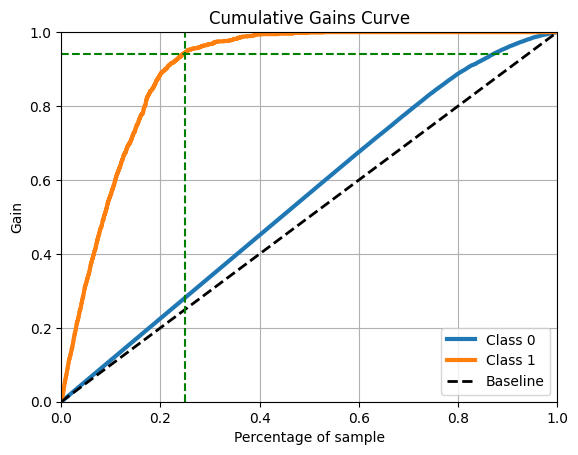

In [85]:
plot_gain_curve(y_test, y_test_pred_prob, x=0.25, y=0.94)

* From the above cumulative gain curve...
    * Orange curve represents the cumulative gain for positive class.
    * A green horizontal and vertical dashed lines are plotted to denote the point where gain curve begins to platue
    * This intersection point tells us, with only 25% of the leads we can acheive 94% of the conversion rate.

In [86]:
metrics['XGB'] = dict()
metrics['XGB']['accuracy'] = acc
metrics['XGB']['auc'] = roc_auc
metrics['XGB']['prec'] = prec
metrics['XGB']['recal'] = rec
metrics['XGB']['f1'] = f1
metrics['XGB']['lift'] = lift_index

#### 6.7 CatBoost Classifier

In [87]:
cat_clf = CatBoostClassifier()

cat_clf.fit(X_train_final, y_train)

Learning rate set to 0.045607
0:	learn: 0.6232101	total: 61.4ms	remaining: 1m 1s
1:	learn: 0.5658422	total: 65.5ms	remaining: 32.7s
2:	learn: 0.5227981	total: 69.7ms	remaining: 23.2s
3:	learn: 0.4789614	total: 73.7ms	remaining: 18.4s
4:	learn: 0.4365095	total: 77.7ms	remaining: 15.5s
5:	learn: 0.4056243	total: 81.6ms	remaining: 13.5s
6:	learn: 0.3800298	total: 85.4ms	remaining: 12.1s
7:	learn: 0.3516523	total: 89.6ms	remaining: 11.1s
8:	learn: 0.3285174	total: 93.6ms	remaining: 10.3s
9:	learn: 0.3157899	total: 97.6ms	remaining: 9.66s
10:	learn: 0.3022915	total: 101ms	remaining: 9.12s
11:	learn: 0.2918589	total: 105ms	remaining: 8.67s
12:	learn: 0.2802338	total: 109ms	remaining: 8.28s
13:	learn: 0.2718268	total: 113ms	remaining: 7.96s
14:	learn: 0.2635032	total: 117ms	remaining: 7.66s
15:	learn: 0.2552955	total: 120ms	remaining: 7.38s
16:	learn: 0.2472049	total: 124ms	remaining: 7.15s
17:	learn: 0.2429703	total: 127ms	remaining: 6.95s
18:	learn: 0.2363998	total: 131ms	remaining: 6.77s
1

##### 6.7.1 Performance Analysis - Confusion matrix, Accuracy, AUC, F1 Score, LIFT

Model Accuracy:  0.9148257241040746


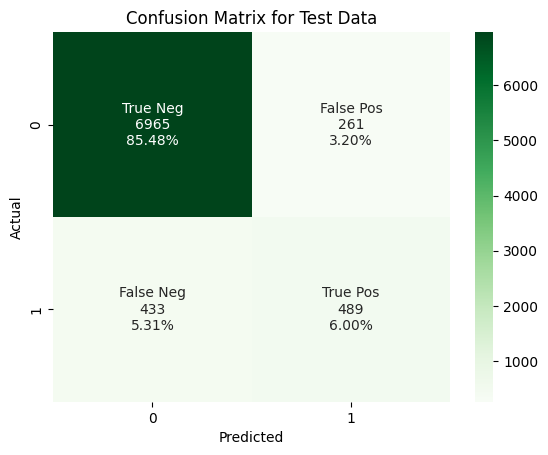

In [88]:
y_test_pred, acc = print_confusion_matrix_accuracy(cat_clf, X_test_final, y_test)

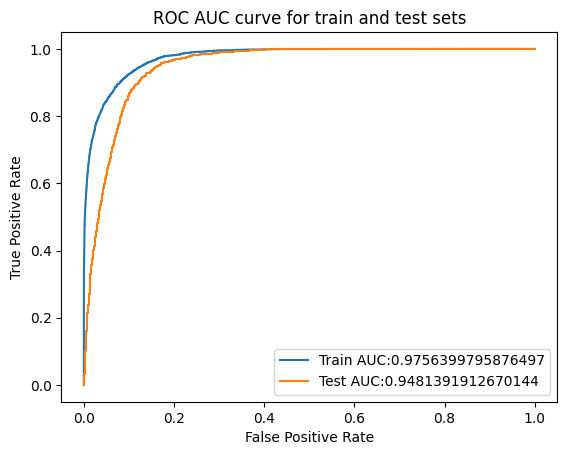

In [89]:
y_train_pred_prob, y_test_pred_prob, roc_auc = plot_auc(cat_clf, X_train_final, X_test_final, y_train, y_test)

In [90]:
prec, rec, f1 = precision_recall_f1(y_test, y_test_pred)

Precision Score for class-0: 0.94147066774804 and class-1:  0.652
----------------------------------------------------------------------------------------------------
Recall Score for class-0: 0.963880431774149 and class-1: 0.5303687635574837
----------------------------------------------------------------------------------------------------
F1 Score for class-0: 0.9525437636761488 and class-1: 0.5849282296650717


In [91]:
lift_index = get_lift_index(y_test, y_test_pred_prob)
lift_index

/var/folders/cr/9s09bcld7z3fwks4vwn0x5900000gn/T/ipykernel_27705/869940014.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lift_df = decile_df.groupby('decile')['y_pred'].count().reset_index()
/var/folders/cr/9s09bcld7z3fwks4vwn0x5900000gn/T/ipykernel_27705/869940014.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lift_df_pred = decile_df[decile_df.y_true==1].groupby('decile')['y_true'].count().reset_index()


0.9417570498915401

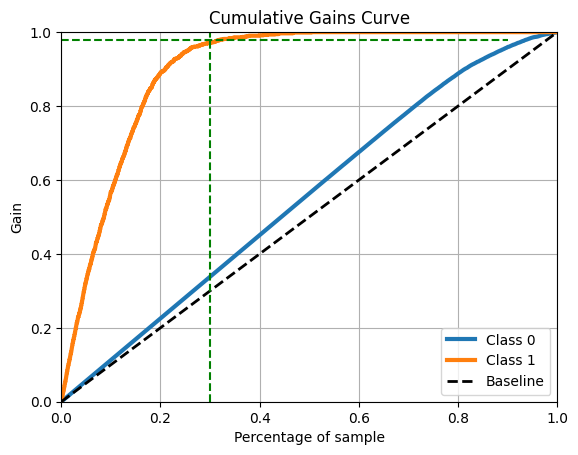

In [92]:
plot_gain_curve(y_test, y_test_pred_prob, x=0.30, y=0.98)

* From the above cumulative gain curve...
    * Orange curve represents the cumulative gain for positive class.
    * A green horizontal and vertical dashed lines are plotted to denote the point where gain curve begins to platue
    * This intersection point tells us, with only 30% of the leads we can acheive 98% of the conversion rate.

In [93]:
metrics['CAT'] = dict()
metrics['CAT']['accuracy'] = acc
metrics['CAT']['auc'] = roc_auc
metrics['CAT']['prec'] = prec
metrics['CAT']['recal'] = rec
metrics['CAT']['f1'] = f1
metrics['CAT']['lift'] = lift_index

#### 6.8 LGBM Classifier

In [94]:
lgbm_clf = LGBMClassifier()

lgbm_clf.fit(X_train_final, y_train)

NameError: name 'LGBMClassifier' is not defined

##### 6.8.1 Performance Analysis - Confusion matrix, Accuracy, AUC, F1 Score, LIFT

Model Accuracy:  0.9167893961708394


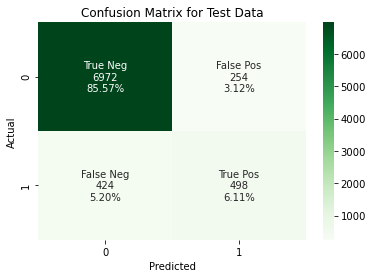

In [ ]:
y_test_pred, acc = print_confusion_matrix_accuracy(lgbm_clf, X_test_final, y_test)

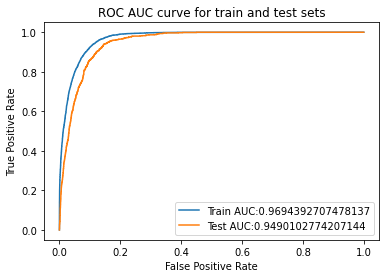

In [ ]:
y_train_pred_prob, y_test_pred_prob, roc_auc = plot_auc(lgbm_clf, X_train_final, X_test_final, y_train, y_test)

In [ ]:
prec, rec, f1 = precision_recall_f1(y_test, y_test_pred)

Precision Score for class-0: 0.942671714440238 and class-1:  0.6622340425531915
----------------------------------------------------------------------------------------------------
Recall Score for class-0: 0.9648491558261832 and class-1: 0.5401301518438177
----------------------------------------------------------------------------------------------------
F1 Score for class-0: 0.9536315141567502 and class-1: 0.5949820788530465


In [ ]:
lift_index = get_lift_index(y_test, y_test_pred_prob)
lift_index

0.941648590021692

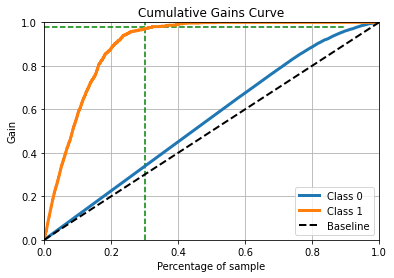

In [ ]:
plot_gain_curve(y_test, y_test_pred_prob, x=0.30, y=0.98)

* From the above cumulative gain curve...
    * Orange curve represents the cumulative gain for positive class.
    * A green horizontal and vertical dashed lines are plotted to denote the point where gain curve begins to platue
    * This intersection point tells us, with only 30% of the leads we can acheive 98% of the conversion rate.

In [ ]:
metrics['LGBM'] = dict()
metrics['LGBM']['accuracy'] = acc
metrics['LGBM']['auc'] = roc_auc
metrics['LGBM']['prec'] = prec
metrics['LGBM']['recal'] = rec
metrics['LGBM']['f1'] = f1
metrics['LGBM']['lift'] = lift_index

## 7. Summary

In [ ]:
from tabulate import tabulate
heads = ['Classifier', 'Accuracy', 'AUC', 'Precision', 'Recall', 'F1_Score', 'Lift Index']

data_table = []
for clf in metrics:
    # print(clf, "====", metric, "====", metrics[clf][metric])
    data_table.append([clf, metrics[clf]['accuracy'], metrics[clf]['auc'], metrics[clf]['prec'][1], 
                       metrics[clf]['recal'][1], metrics[clf]['f1'][1], metrics[clf]['lift']])

print(tabulate(data_table, heads, tablefmt='orgtbl'))

| Classifier   |   Accuracy |      AUC |   Precision |   Recall |   F1_Score |   Lift Index |
|--------------+------------+----------+-------------+----------+------------+--------------|
| LR           |   0.912862 | 0.933678 |    0.677852 | 0.438178 |   0.532279 |     0.929826 |
| NB           |   0.87187  | 0.830369 |    0.44043  | 0.489154 |   0.463515 |     0.838612 |
| SVC          |   0.911757 | 0.915065 |    0.67591  | 0.422993 |   0.520347 |     0.912473 |
| DT           |   0.908567 | 0.891933 |    0.603267 | 0.560738 |   0.581225 |     0.909002 |
| RF           |   0.913476 | 0.942995 |    0.675283 | 0.453362 |   0.542505 |     0.935792 |
| XGB          |   0.913844 | 0.945731 |    0.639949 | 0.545553 |   0.588993 |     0.940022 |
| CAT          |   0.914458 | 0.947883 |    0.650602 | 0.527115 |   0.582385 |     0.941757 |
| LGBM         |   0.916789 | 0.94901  |    0.662234 | 0.54013  |   0.594982 |     0.941649 |
| SVC Linear   |   0.907094 | 0.932223 |    0.668024 | 0.355

* Accuracy, AUC, F1 score and Lift index are at their best for LGBM classifier.
* Precision has best value in LR
* Recall has best value in DT

* Above is the performance of basic classifiers without any hyper parameter tuning. 